**High School Students' Exam Performance Prediction - A Data Science Project**


> by **PRAJAKTA SINGHAL**



*   📊 **Description**: : This project is based on a dataset containing information on the performance of high school students in exams, including their grades and demographic information. The data was collected from three high schools in the United States.

*   📈 **Task** : We are required to use the train.csv dataset to predict the exam scores in the test.csv file. The results should be submitted using the submission.csv template.














In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload files
uploaded = files.upload()

# Read the uploaded files
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
sample_submission = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))

# Display the first few rows of each dataset to confirm loading
print(train_data.head())
print(test_data.head())
print(sample_submission.head())


Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
     Roll no test preparation   gender parental level of education  \
0  EXA000001              none    male                some college   
1  EXA000002              none    male             master's degree   
2  EXA000003              none    male             master's degree   
3  EXA000004              none  female                some college   
4  EXA000005              none  female                 high school   

          lunch    Section  practical score  viva score  exam score  
0      standard  Section A               70          73          70  
1  free/reduced  Section C               55          54          52  
2  free/reduced  Section E               56          46          43  
3  free/reduced  Section C               35          47          41  
4      standard  Section C               87          92          81  
    Roll no test preparation   gender parental 

**Data Exploration and Visualization**

     Roll no test preparation   gender parental level of education  \
0  EXA000001              none    male                some college   
1  EXA000002              none    male             master's degree   
2  EXA000003              none    male             master's degree   
3  EXA000004              none  female                some college   
4  EXA000005              none  female                 high school   

          lunch    Section  practical score  viva score  exam score  
0      standard  Section A               70          73          70  
1  free/reduced  Section C               55          54          52  
2  free/reduced  Section E               56          46          43  
3  free/reduced  Section C               35          47          41  
4      standard  Section C               87          92          81  
       practical score    viva score    exam score
count     31999.000000  31999.000000  31999.000000
mean         67.839870     70.375168     69.139598
std   

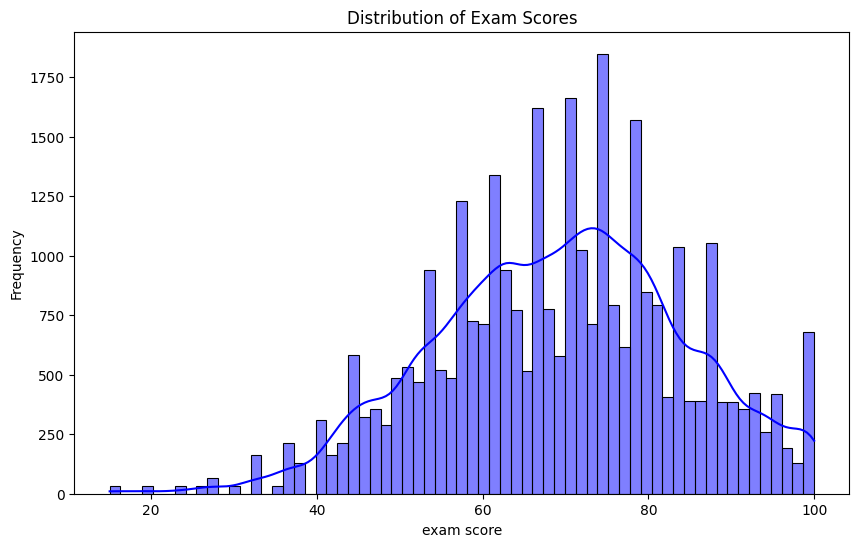

<ipython-input-42-8136a351cf13>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='exam score', data=train_data, palette='Set2')


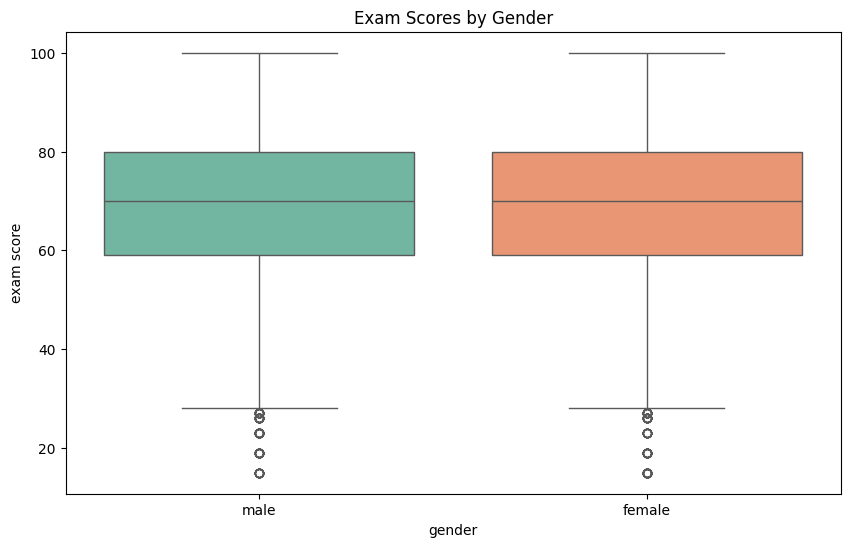

<ipython-input-42-8136a351cf13>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lunch', y='exam score', data=train_data, palette='Set3')


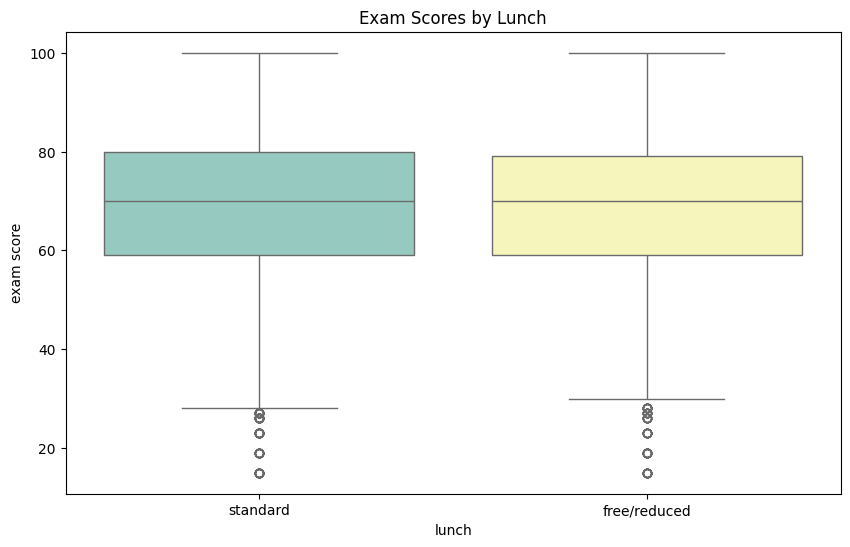

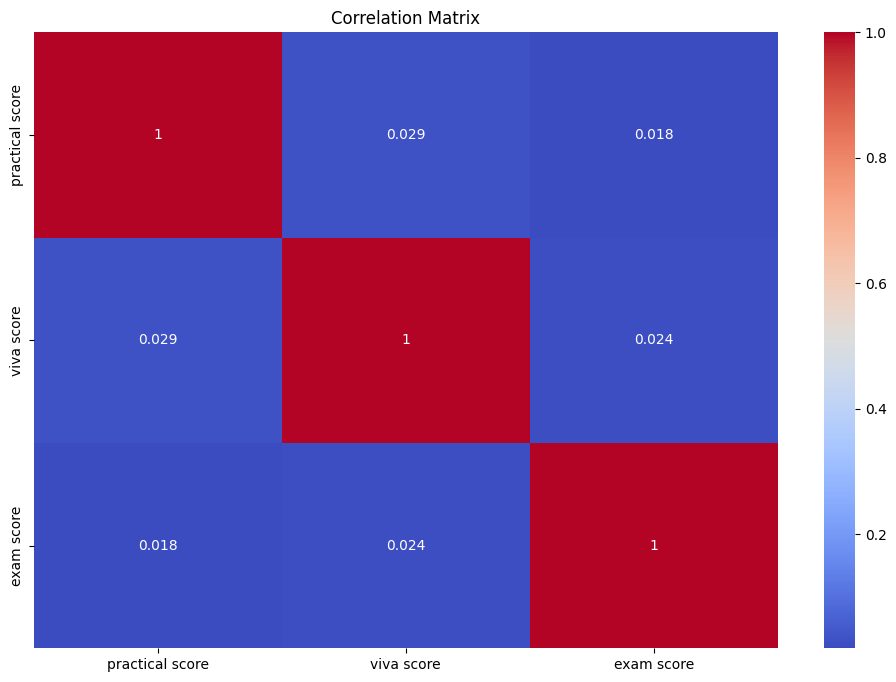

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the training data
print(train_data.head())

# Summary statistics
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())

# Visualize the distribution of exam scores
plt.figure(figsize=(10, 6))
sns.histplot(train_data['exam score'], kde=True, color='blue')
plt.title('Distribution of Exam Scores')
plt.xlabel('exam score')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize the distribution of exam scores by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='exam score', data=train_data, palette='Set2')
plt.title('Exam Scores by Gender')
plt.xlabel('gender')
plt.ylabel('exam score')
plt.show()

# Boxplot to visualize the distribution of exam scores by lunch
plt.figure(figsize=(10, 6))
sns.boxplot(x='lunch', y='exam score', data=train_data, palette='Set3')
plt.title('Exam Scores by Lunch')
plt.xlabel('lunch')
plt.ylabel('exam score')
plt.show()

# Correlation matrix to understand relationships between numerical features
numeric_cols = train_data.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Display the column names of train_data and test_data
print("Columns in train_data:", train_data.columns)
print("Columns in test_data:", test_data.columns)

Columns in train_data: Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score'],
      dtype='object')
Columns in test_data: Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score'],
      dtype='object')


**Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Ensure the test_data has the same columns as train_data except for 'exam score'
if 'exam score' in test_data.columns:
    test_data = test_data.drop(columns=['exam score'])

# Impute missing values with the mean for training data
imputer = SimpleImputer(strategy='mean')

# Identify numerical columns
numerical_columns = ['practical score', 'viva score', 'exam score']

# Fit the imputer on the numerical columns of the train_data
train_data[numerical_columns] = imputer.fit_transform(train_data[numerical_columns])

# Impute missing values with the mean for test data, without 'exam score'
test_data[['practical score', 'viva score']] = SimpleImputer(strategy='mean').fit_transform(test_data[['practical score', 'viva score']])

# Display column names before one-hot encoding
print("Columns in train_data before encoding:", train_data.columns)
print("Columns in test_data before encoding:", test_data.columns)

# One-hot encode categorical variables
categorical_columns = ['gender', 'Section', 'parental level of education', 'lunch', 'test preparation ']
train_data = pd.get_dummies(train_data, columns=[col for col in categorical_columns if col in train_data.columns])
test_data = pd.get_dummies(test_data, columns=[col for col in categorical_columns if col in test_data.columns])

# Align the test data to match the training data columns
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

# Drop the target variable 'exam score' from test_data if it exists
if 'exam score' in test_data.columns:
    test_data = test_data.drop(columns=['exam score'])

# Separate features and target variable from training data
X = train_data.drop(['Roll no', 'exam score'], axis=1)
y = train_data['exam score']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop 'Roll no' from test_data before scaling
test_data = test_data.drop(columns=['Roll no'])

# Ensure there are no missing values before scaling
imputer = SimpleImputer(strategy='mean')

# Apply imputer and reapply column names
X_train_columns = X_train.columns
X_val_columns = X_val.columns
test_data_columns = test_data.columns

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train_columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val_columns)
test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data_columns)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

# Display some information about the transformed data
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Test data shape:", test_data.shape)
print("First 5 rows of X_train:", X_train[:5])


Columns in train_data before encoding: Index(['Roll no', 'test preparation ', 'practical score', 'viva score',
       'exam score', 'gender_female', 'gender_male', 'Section_Section A',
       'Section_Section B', 'Section_Section C', 'Section_Section D',
       'Section_Section E', 'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard'],
      dtype='object')
Columns in test_data before encoding: Index(['test preparation ', 'practical score', 'viva score', 'gender_female',
       'gender_male', 'Section_Section A', 'Section_Section B',
       'Section_Section C', 'Section_Section D', 'Section_Section E',
       'parental level of education_associate's degree',
       'parental level o

**Model Training and Hyperparameter Tuning**

`Train the Random Forest and Gradient Boosting models using hyperparameter tuning.`

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Random Forest model and hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42, verbose=2)
random_search_rf.fit(X_train, y_train)

# Get best hyperparameters and make predictions on the validation set
if hasattr(random_search_rf, 'best_estimator_'):
    print(f'Best parameters: {random_search_rf.best_params_}')
    y_pred_rf = random_search_rf.best_estimator_.predict(X_val)
    mse_rf = mean_squared_error(y_val, y_pred_rf)
    print(f'Random Forest MSE: {mse_rf}')
else:
    print("RandomizedSearchCV did not find a best estimator.")

# Gradient Boosting model and hyperparameter tuning
gb_model = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_gb = GridSearchCV(gb_model, param_grid=param_grid_gb, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Get best hyperparameters and make predictions on the validation set
if hasattr(grid_search_gb, 'best_estimator_'):
    print(f'Best parameters for Gradient Boosting: {grid_search_gb.best_params_}')
    y_pred_gb = grid_search_gb.best_estimator_.predict(X_val)
    mse_gb = mean_squared_error(y_val, y_pred_gb)
    print(f'Gradient Boosting MSE: {mse_gb}')
else:
    print("GridSearchCV did not find a best estimator.")

# Evaluate models if hyperparameter tuning did not find the best estimators
if not hasattr(random_search_rf, 'best_estimator_'):
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_val)
    mse_rf = mean_squared_error(y_val, y_pred_rf)
    print(f'Random Forest MSE: {mse_rf}')

if not hasattr(grid_search_gb, 'best_estimator_'):
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_val)
    mse_gb = mean_squared_error(y_val, y_pred_gb)
    print(f'Gradient Boosting MSE: {mse_gb}')


Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Random Forest MSE: 220.99053741002012
Fitting 2 folds for each of 243 candidates, totalling 486 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Gradient Boosting MSE: 220.8265501770185


**Make Predictions on Test Data and Save Submission File**

In [ ]:
# Make predictions on the test data using the best Random Forest model
if hasattr(random_search_rf, 'best_estimator_'):
    test_predictions_rf = random_search_rf.best_estimator_.predict(test_data_scaled)
else:
    test_predictions_rf = None
    print("RandomizedSearchCV did not find a best estimator for Random Forest. Skipping predictions.")

# Make predictions on the test data using the best Gradient Boosting model
if hasattr(grid_search_gb, 'best_estimator_'):
    test_predictions_gb = grid_search_gb.best_estimator_.predict(test_data_scaled)
else:
    test_predictions_gb = None
    print("GridSearchCV did not find a best estimator for Gradient Boosting. Skipping predictions.")

# Combine predictions from both models if available
if test_predictions_rf is not None and test_predictions_gb is not None:
    final_predictions = (test_predictions_rf + test_predictions_gb) / 2
elif test_predictions_rf is not None:
    final_predictions = test_predictions_rf
elif test_predictions_gb is not None:
    final_predictions = test_predictions_gb
else:
    final_predictions = None

# Ensure final_predictions are available before proceeding
if final_predictions is not None:
    # Create a DataFrame for the submission
    submission = pd.DataFrame({'Roll no': sample_submission['Roll no'], 'exam score': final_predictions})

    # Save the submission file
    submission.to_csv('submission.csv', index=False)
    print("Submission file created successfully!")
else:
    print("No final predictions available. Submission file not created.")


Submission file created successfully!


`Download the file `

In [ ]:
from google.colab import files

# This will download the 'submission.csv' file to your local machine
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>